In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import json

C:\Users\Valentin\AppData\Local\Temp\ipykernel_8508\2317248303.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate('', xy=(df.index[i+1], df['Avg'][i+1]),
C:\Users\Valentin\AppData\Local\Temp\ipykernel_8508\2317248303.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(df.index[i], df['Avg'][i]),


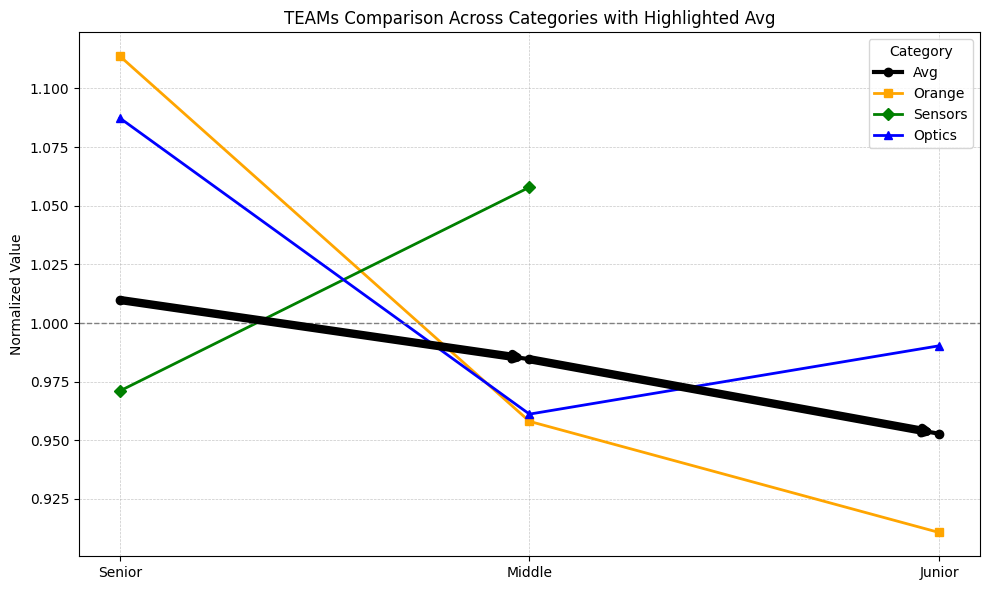

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation
data = {
    'TEAMs': ['Senior', 'Middle', 'Junior'],
    'Avg': [1.009828333, 0.98457725, 0.9528],
    'Orange': [1.113772, 0.958084, 0.91072],
    'Sensors': [0.971053, 1.057895, np.nan],
    'Optics': [1.087379, 0.961165, 0.990291]
}

df = pd.DataFrame(data)
df.set_index('TEAMs', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
markers = ['o', 's', 'D', '^']
colors = ['black', 'orange', 'green', 'blue']

# Plotting with highlighted Avg line and arrows
# Plot each category
for i, column in enumerate(df.columns):
    linewidth = 3 if column == 'Avg' else 2
    zorder = 3 if column == 'Avg' else 2
    ax.plot(df.index, df[column], marker=markers[i], color=colors[i], 
            label=column, linewidth=linewidth, zorder=zorder)

# Add arrows to Avg line
for i in range(len(df.index)-1):
    ax.annotate('', xy=(df.index[i+1], df['Avg'][i+1]), 
                xytext=(df.index[i], df['Avg'][i]),
                arrowprops=dict(arrowstyle='->', color='black', lw=6))

# Visual Enhancements
ax.axhline(1, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel('Normalized Value')
ax.set_title('TEAMs Comparison Across Categories with Highlighted Avg')
ax.legend(title='Category')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()



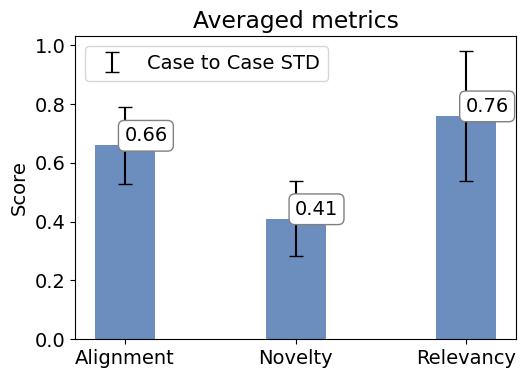

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.size': 14})

# Prepare data
metrics = ['Alignment', 'Novelty', 'Relevancy']
avgs = [0.66, 0.41,0.76]
project_stds = [0.1304, 0.1283, 0.2216]  # Project-to-project STD
x = np.arange(len(metrics))

# Plot
fig, ax = plt.subplots(figsize=(5.5, 4))
bars = ax.bar(x, avgs, width=0.35, color='#6C8EBF')

# Add error bars for project-to-project variation
ax.errorbar(x, avgs, yerr=project_stds, 
                fmt='none', capsize=5, color='black', label='Case to Case STD')

for bar in bars:
    ax.annotate(f'{bar.get_height():,}',
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(15, 0),  # 10 points above the bar
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=14,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='gray'))
ax.set_ylabel('Score')
ax.set_title('Averaged metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.tight_layout()
plt.savefig("plot_avg.png", dpi=500)
plt.show()


C:\Users\Valentin\AppData\Local\Temp\ipykernel_11128\112177219.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(teams, rotation=45, ha='right', rotation_mode='anchor')


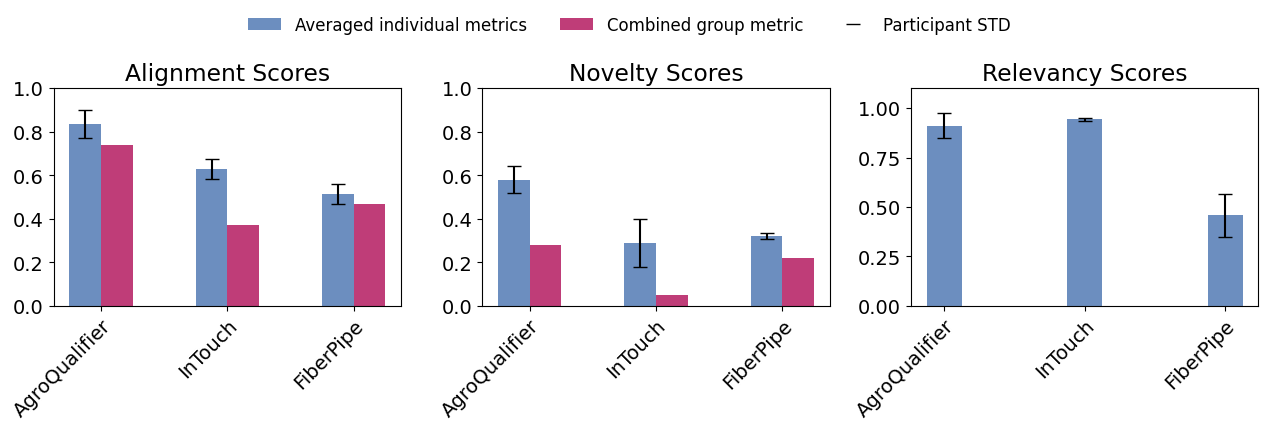

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 14})

# Averagezzs data
team_avgs = {
    'Team Orange': [0.835, 0.58, 0.91, 0.5],
    'Team Sensors': [0.63, 0.29, 0.943,0.61],
    'Team Optics': [0.515, 0.32, 0.4575, 0.345]
}

combined_avgs = {
    'Team Orange': [0.74, 0.28, None, 0.69],
    'Team Sensors': [0.37, 0.05, None, 0.51],
    'Team Optics': [0.47, 0.22, None, 0.45]
}

# Standard deviations
team_stds = {
    'Team Orange': [0.0634, 0.0616, 0.0636,0.07],
    'Team Sensors': [0.0450, 0.11, 0.0094,0.032],
    'Team Optics': [0.046, 0.013, 0.11, 0.01]
}

# Prepare data for subplots
teams = list(team_avgs.keys())
x = range(len(teams))
colors = ['#FF7F0E', '#1F77B4', '#2CA02C']  # Orange, Blue, Green
width = 0.25

# Create figure with 2 rows, 2 columns (we'll leave the last subplot empty)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Alignment subplot (top left)
axes[0].bar(teams, [avgs[0] for avgs in team_avgs.values()], width, color='#2CA02C')
axes[0].bar([i +width for i in x], [avgs[0] for avgs in combined_avgs.values()], width, color="#98DF8A")

axes[0].set_title('Alignment Scores')
axes[0].set_ylim(0, 1)
axes[0].errorbar(teams, [avgs[0] for avgs in team_avgs.values()], yerr=[err[0] for err in team_stds.values()],
                         fmt='none', capsize=5, color='black', label='Participant to Participant STD')
# Diversity subplot (top right)
axes[1].bar(teams, [avgs[1] for avgs in team_avgs.values()], width, color="#2CA02C")
axes[1].bar([i +width for i in x], [avgs[1] for avgs in combined_avgs.values()], width, color="#98DF8A")

axes[1].set_title('Diversity Scores')
axes[1].set_ylim(0, 1)
axes[1].errorbar(teams, [avgs[1] for avgs in team_avgs.values()], yerr=[err[1] for err in team_stds.values()],
                         fmt='none', capsize=5, color='black', label='Participant to Participant STD')

# Relevancy subplot (bottom left)
axes[2].bar(teams, [avgs[2] for avgs in team_avgs.values()], width, color="#2CA02C")

axes[2].set_title('Relevancy Scores')
axes[2].set_ylim(0, 1.1)
axes[2].errorbar(teams, [avgs[2] for avgs in team_avgs.values()], yerr=[err[2] for err in team_stds.values()],
                         fmt='none', capsize=5, color='black', label='Participant to Participant STD')
# axes[3].bar(teams, [avgs[3] for avgs in team_avgs.values()], width, color="#2CA02C")
# axes[3].bar([i +width for i in x], [avgs[3] for avgs in combined_avgs.values()], width, color="#98DF8A")

# axes[3].set_title('F1 Scores')
# axes[3].set_ylim(0, 1.1)
# axes[3].errorbar(teams, [avgs[3] for avgs in team_avgs.values()], yerr=[err[3] for err in team_stds.values()],
#                          fmt='none', capsize=5, color='black', label='Participant to Participant STD')

# Add these modifications to each subplot after creation:
for i, ax in enumerate(axes):
    if i != 2:
    # # ax.grid(True, linestyle='-', alpha=0.7)
        # Rotate x-axis labels
        ax.set_xticks([i + width/2 for i in x])  # Center labels between bars
    ax.set_xticklabels(teams, rotation=45, ha='right', rotation_mode='anchor')


# Adjust layout to accommodate rotated labels
plt.tight_layout(pad=2.0)

import matplotlib.patches as mpatches

# 1. Create custom legend handles
legend_handles = [
    mpatches.Patch(facecolor='#2CA02C', label='Averaged individual participants metrics'),
    mpatches.Patch(facecolor='#98DF8A', label='Combined brainstorming metrics'),
    plt.Line2D([0], [0], color='black', marker='_', markersize=10,
               linewidth=1.5, label='Participant STD', linestyle='None')
]

# 2. Replace your legend code with:
fig.legend(handles=legend_handles, 
           loc='upper center',
           bbox_to_anchor=(0.5, 1.1),
           ncol=3,  # Now 3 items (default, combined, STD)
           frameon=False,
           fontsize=12)

plt.tight_layout()
plt.show()